<a href="https://colab.research.google.com/github/val93s/Titanic_final_project/blob/main/Copy_of_Titanic_Machine_Learning_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Final Project

### Predicting Survival on the *Titanic*

The final project is intended to simulate participation in a Kaggle competition. Your challenge is to build the most accurate model for predicting which passangers would survive the sinking of the *Titanic*. The ***Titanic Machine Learning Final Project.ipynb*** Colab notebook provides some guidance for tackling the project and suggests some things to think about as you get started. However, many of the model-building decisions are left up to you. 
**Note**: Use comments in your code and text blocks to explain your decisions and results.

### Build a Pipeline for a Kaggle Competition!

Kaggle was started in 2010 as a platform for machine learning competitions, which aim to identify how best to optimize supervised learning problems. These initiatives offer a two-way benefit. They help companies improve their internal algorithms and they provide prospective data professionals opportunities to prove their worth.

Though Kaggle usually has a singular aim of maximizing a specific metric, the idea of finding the best possible algorithm and furthermore optimizing its hyperparameters is the daily task of a data scientist. Moreover, success in Kaggle can be great for a future resume (since your information is saved on their site).

Obviously, the timeframe for this lesson is not realistic in terms of a typical Kaggle workflow, as competitors spend weeks or even months optimizing every piece of an algorithm they can. However, you can get started with preliminary testing and use these principles to enter your own Kaggle competitions in the future!

# Step 1: Importing Libraries

It is best practice to import all libraries and packages early in the process.

You'll probably want to import Pandas plus some packages from scikit-learn.

| Type | Path | Regression | Classification |
| --- | --- | --- | --- |
| **Linear Models** | `sklearn.linear_model` | `LinearRegression` | `LogisticRegression` |
|  |  |`Ridge` | `RidgeClassifier` |
|  |  |`Lasso` |  |
| **K Nearest Neighbors** | `sklearn.neighbors` | `KNeighborsRegressor` | `KNeighborsClassifier` |
| **Support Vector Machines** | `sklearn.svm.` | `SVR` | `SVC` |
| **Naive Bayes** |  `sklearn.naive_Bayes` |  |`CategoricalNB` (Categorical) |
|  |  |  | `MultinomialNB` (Sentiment Analysis) |
| **Decision Trees** | `sklearn.tree` | `DecisionTreeRegressor` | `DecisionTreeClassifier` |
| **Ensemble - Random Forests** | `sklearn.ensemble` | `RandomForestRegressor` | `RandomForestClassifier`
| **Ensemble - Boosting** | `sklearn.ensemble` | `AdaBoostRegressor` | `AdaBoostClassifier` |
|  | `sklearn.ensemble` | `GradientBoostRegressor` | `GradientBoostClassifier` |



| Type | Path | Package |
| --- | --- | --- |
| Preprocessing | `sklearn.preprocessing` | `StandardScaler` |
| |`sklearn.preprocessing` | `MinMaxScaler` |
| |`sklearn.preprocessing` | `MaxAbsScaler` |
| Model Selection - Splitting| `sklearn.model_selection` | `train_test_split` |
| Model Selection - Grid Search | `sklearn.model_selection` | `GridSearchCV` |
| Model Selection - Scoring | `sklearn.model_selection` | `cross_val_score` |
| Metrics | `sklearn.metrics` | `confusion_matrix` |


**Note**: Use comments in your code and text blocks to explain your decisions and results.




In [ ]:
#Step 1
#Import required libraries
#linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, Lasso, RidgeClassifier, Ridge, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve



#Step 2:  Load the `Titanic.csv` Data
You may want to refer back to one of your previous Colab notebooks to copy the Google Import code.

**Note**: Use comments in your code and text blocks to explain your decisions and results.

In [ ]:
#Step 2

from google.colab import files
segmentation = files.upload()

Saving Titanic (1).csv to Titanic (1) (2).csv


In [ ]:
Titanic = pd.read_csv('Titanic.csv')
Titanic_1 = pd.read_csv('Titanic_1.csv')
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

#Step 3: Split the Data

The next step is to separate the target column from the feature matrix and perform a train/test split. 

*   What is the target and what are the features in the data?
*   Are there any features that you want to drop?
*   Is there any feature engineering that you need to do?

**Note**: Use comments in your code and text blocks to explain your decisions and results.

 

In the dataset there are 891 entries and 11 features. The target variable is(survived). There are 2 features that are considered floats as shown below, 5 are integers, and 5 are objects.
The features I am considering in dropping that I see not useful will be name, ticket, and fare. I also think cabin needs to be dropped since there is too much missing data thats almost majority of the dataset. Please see visualization below:

In [ ]:
#Seperate Dependent and Independent variables
x=Titanic[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
y=Titanic['Survived']

In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
Titanic_1.index

RangeIndex(start=0, stop=891, step=1)

In [ ]:
Titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
Titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In the dataset above you can also see that the passenger ages ranges from 0.4 being the minimum to 80 being the maximum. 

In [ ]:
#Step 3
X = Titanic[['PassengerId','Sex','Age', 'SibSp', 'Embarked']]
y = Titanic[['Survived']]
X.head()

,PassengerId,Sex,Age,SibSp,Embarked
0,1,male,22.0,1,S
1,2,female,38.0,1,C
2,3,female,26.0,0,S
3,4,female,35.0,1,S
4,5,male,35.0,0,S


I am checking for null values as shown below.

In [ ]:
Titanic.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


I am looking for null values and what might be missing in my dataset.

In [ ]:
total = Titanic.isnull().sum().sort_values(ascending=False)
percent_1 = Titanic.isnull().sum()/Titanic.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In addition, I can detect some features that contain missing values, like the ‘Age’, 'Cabin', and 'Embarked'. These features shown above may need engineering. As I mentioned before, considering in dropping cabin since there is 687 missing which takes up the whole data set. There is about 20% of missing data in age and about 77% of missing null values in Cabin.

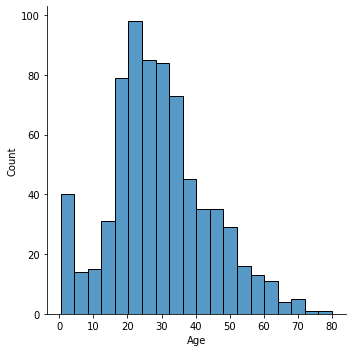

In [ ]:
sns.displot(x='Age',data=Titanic)

In the image above you can find the distribution for the age column

As shown below, you will see a countplot of survived vs not survived below.

<AxesSubplot:xlabel='Survived', ylabel='count'>

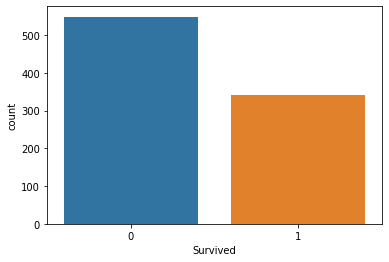

In [ ]:
sns.countplot(x='Survived', data=Titanic)

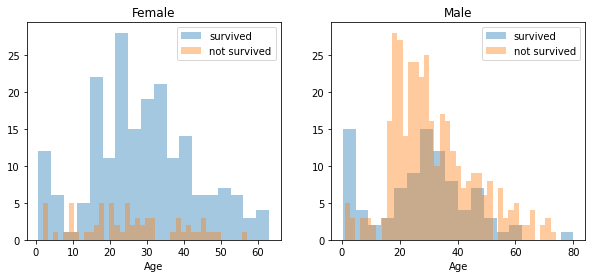

In [ ]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = Titanic[Titanic['Sex']=='female']
men = Titanic[Titanic['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

As shown in the image above, men have a low probability of survival as compared to women. 

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


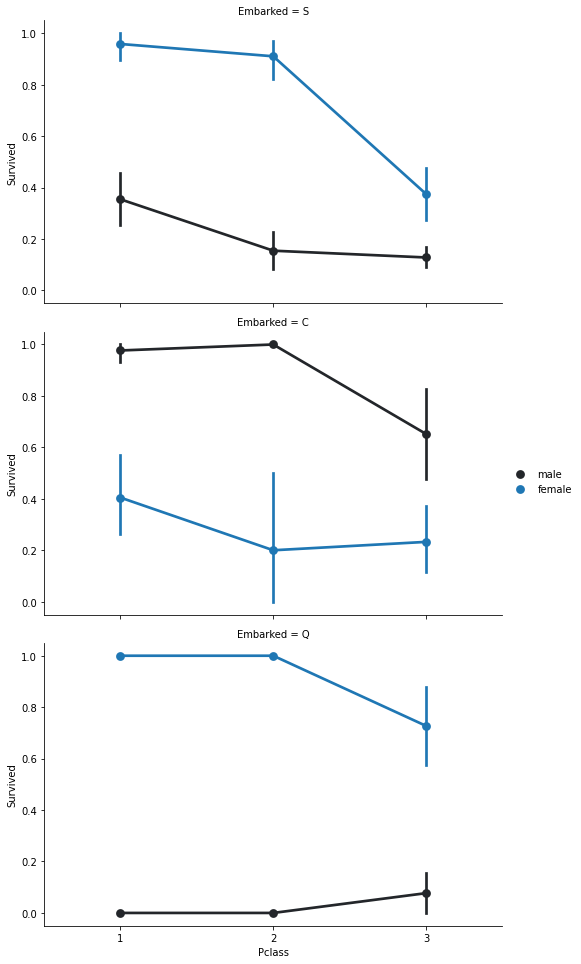

In [ ]:
FacetGrid = sns.FacetGrid(Titanic, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

Embarked and Pclass are two of the features that I think will correlate with survival, depending on the gender.

Women on port Q and on port S have a higher chance of survival. Men have a high survival probability if they are on port C, but a low probability if they are on port Q or S.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

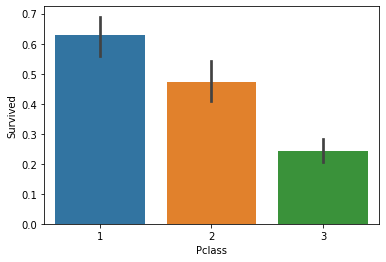

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=Titanic)

In the barplot above, Pclass is contributing to a persons chance of survival, especially if this person is in class 1 you can see a higher survival rate.

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


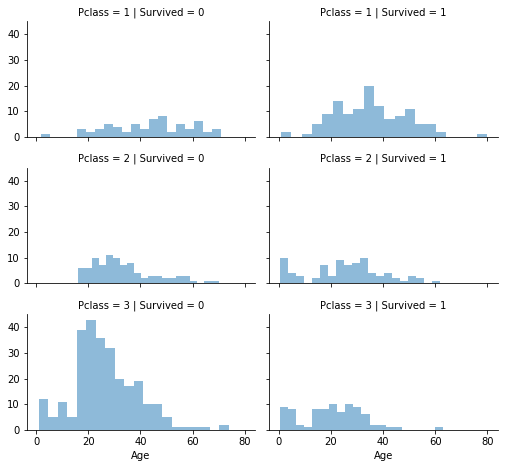

In [ ]:
grid = sns.FacetGrid(Titanic, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

The plot above confirms our prediction about pclass 1, but we can also see a high probability that a person in pclass 3 will not survive.

In [ ]:
data = [Titanic, Titanic]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
Titanic['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

This shows the total number of relatives each passenger has on the Titanic.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


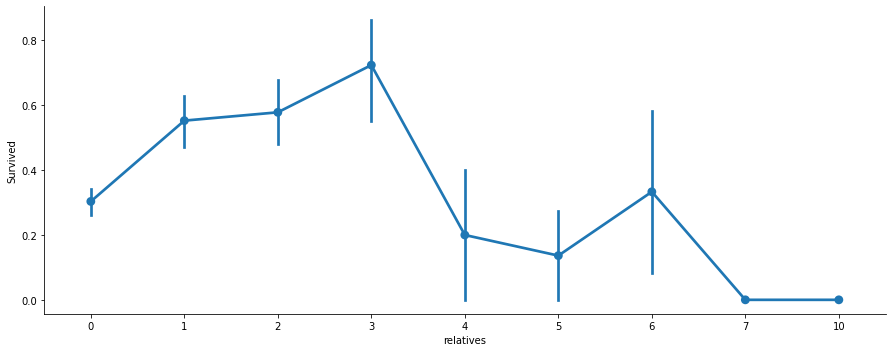

In [ ]:
axes = sns.factorplot('relatives','Survived', 
                      data=Titanic, aspect = 2.5, )

There is a high probabilty of survival with 1 to 3 relatives, but a lower one if you had less than 1 or more than 3 relatives.

#Step 4: Clean and Preprocess the Data

Use the code block below to clean and preprocess your data. Some considerations you may want to think about include the following:  
*  Are there any missing values that need to be imputed?
*  Do you need to encode any categorical features?
*  Do you need to standardize any quantitative features?
 
**Note**: Use comments in your code and text blocks to explain your decisions and results.

 

A cabin number looks like ‘C123’ and the letter refers to the deck. I'll extract these and create a new feature, that contains a persons deck. I will then convert the feature into a numeric variable. The missing values will be converted to zero. In the picture below you can see the actual decks of the titanic, ranging from A to U.

In [ ]:
#step 4
import re
import pandas as pd

Titanic_1 = pd.read_csv("Titanic_1.csv")
Titanic = pd.read_csv("Titanic.csv")

deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [Titanic, Titanic_1]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(
        lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

Titanic = Titanic.drop(['Cabin'], axis=1)
Titanic_1 = Titanic_1.drop(['Cabin'], axis=1)
print(Titanic, Titanic_1)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

We can see that the cabin column has a significant amount of null values so we cannot use it for prediction in our dataset. So I decided to drop the column as shown above.

In [ ]:
data = [Titanic, Titanic_1]

for dataset in data:
    mean = Titanic["Age"].mean()
    std = Titanic_1["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # I computed random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # I also filled NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = Titanic["Age"].astype(int)
Titanic["Age"].isnull().sum()

0

In [ ]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,8


You can see above cabin column is no longer in my dataset.

In [ ]:
Titanic['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
common_value = 'S'
data = [Titanic, Titanic_1]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

I need to convert Name, Sex, Fare, and Float as shown below. I need to change to assure that all the Dtypes are integers.

In [ ]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Deck         891 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 83.7+ KB


In [ ]:
data = [Titanic, Titanic_1]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
genders = {"male": 0, "female": 1}
data = [Titanic, Titanic_1]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)



In [ ]:
Titanic['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

Since the Ticket has about 681 unique tickets, it will be difficult to convert them into useful category, so we will drop it from the dataset.

In [ ]:
Titanic = Titanic.drop(['Ticket'], axis=1)
Titanic_1 = Titanic_1.drop(['Ticket'], axis=1)

In [ ]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [Titanic, Titanic_1]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

Converted embarked into integers now.

In [ ]:
Titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7,0,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7,0,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,8,0,8
5,6,0,3,"Moran, Mr. James",0,17,0,0,8,2,8
6,7,0,1,"McCarthy, Mr. Timothy J",0,54,0,0,51,0,5
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2,3,1,21,0,8
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27,0,2,11,0,8
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14,1,0,30,1,8


In [ ]:
Titanic.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex             int64
Age             int64
SibSp           int64
Parch           int64
Fare            int64
Embarked        int64
Deck            int64
dtype: object

My goal was to make sure my whole dataset was converted into integer data types only.

In [ ]:
Titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Deck
0,1,0,3,22,1,0,7,8
1,2,1,1,38,1,0,71,3
2,3,1,3,26,0,0,7,8
3,4,1,1,35,1,0,53,3
4,5,0,3,35,0,0,8,8


In [ ]:
Titanic['Gender']=gender

In [ ]:
Titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Deck,Gender
0,1,0,3,22,1,0,7,8,0
1,2,1,1,38,1,0,71,3,1
2,3,1,3,26,0,0,7,8,1
3,4,1,1,35,1,0,53,3,1
4,5,0,3,35,0,0,8,8,0


Genders
0= male
1=female

SibSP= sibsp # of siblings / spouses aboard the Titanic


#Step 5: Build the Baseline Model

Ideally, you will want to set a baseline algorithm to build off of. The most logical start is *linear regression* for *regression* and *logistic regression* for *classification*, as they are the basis for their respective algorithms.

Once you have the baseline set, you will want to choose an algorithm that surpasses the baseline.

Select a baseline model and fit it to your data.

**Note**: Use comments in your code and text blocks to explain your decisions and results.



In [ ]:
# Step 5

X_train = Titanic.drop("Survived", axis=1)
Y_train = Titanic["Survived"]
X_test  = Titanic_1.drop("PassengerId", axis=1).copy()

In [ ]:
#Logistic Regression

lr=LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Predict
predict=lr.predict(x_test)

#Step 6: Evaluate the Baseline Model

Use cross-validation to calculate the appropriate model evaluation metric. 

Is your model doing a good job fitting the data?  

If you have ideas for how to improve your model fit, go back and make those changes to earlier steps.

**Note**: Use comments in your code and text blocks to explain your decisions and results.


In [ ]:
#Step 6
#confusion Matrix shown below
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,150,25
Actual Yes,36,84


In [ ]:
#Classification report shown below

print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       175
           1       0.77      0.70      0.73       120

    accuracy                           0.79       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295



In [ ]:
accuracy = lr.score(x_train, y_train)
print(accuracy)

0.790268456375839


# Step 7: Fit the Data to at Least One Other Model

Select one (or more) other appropriate model and use it to model the data. Calculate the cross-validation accuracy of each model. 

**Note**: Use comments in your code and text blocks to explain your decisions and results.

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)


random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

The first step we will be using the SimpleImputer which are the(missing_values=np.nan, strategy='mean')

The second step we will be using the StandardScaler(). 

The last step we will be using the SVC(kernel='linear'). 

Then we will be Naming the pipeline linear. Fit the pipeline to X_train and Y_train as shown below.

In [ ]:
#Step 7

pipe_linear = Pipeline([('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
                 ('scaler', StandardScaler()),
                 ('linear', SVC(kernel='linear'))])
pipe_linear.fit(x_train, y_train)

Pipeline(steps=[('imp_mean', SimpleImputer()), ('scaler', StandardScaler()),
                ('linear', SVC(kernel='linear'))])

I will now Calculate and print the accuracy of each of the five models using linear_scores = cross_val_score(linear, X_train, y_train, cv=10). In addition, we will now calculate and print the mean and SD of the accuracy measures returned from cross-validation as shown below.

In [ ]:
scores = cross_val_score(pipe_linear, x_train, y_train, cv=10)
print(scores)
print(scores.mean())
print(scores.std())

[0.65       0.81666667 0.86666667 0.88333333 0.7        0.68333333
 0.81355932 0.79661017 0.74576271 0.86440678]
0.7820338983050847
0.07863538168798999


In [ ]:
pipe_poly = Pipeline([('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
                 ('scaler', StandardScaler()),
                 ('poly', SVC(kernel='poly'))])
pipe_poly.fit(x_train, y_train)

scores = cross_val_score(pipe_poly, x_train, y_train, cv=10)
print(scores)
print(scores.mean())
print(scores.std())

[0.65       0.81666667 0.86666667 0.88333333 0.75       0.7
 0.77966102 0.77966102 0.76271186 0.88135593]
0.7870056497175142
0.07335848723754704


Another pipeline will be built to impute and standardize the data and fit an SVM with a polynomial kernel, then valuate the model using 10-fold CV.

The first step we will be using the SimpleImputer(missing_values=np.nan, strategy='mean')). 

The second step we will be using the StandardScaler(). 

The last step we will be using the SVM(kernel='poly'). Name the pipeline poly. Fit the pipeline to X_train and Y_train. 
I will then Calculate and print the accuracy of each of the five models using poly_scores = cross_val_score(pipe, X_train, y_train, cv=10). Lastly, I will calculate and print the mean and SD of the accuracy measures returned from cross-validation.

In [ ]:
pipe_poly = Pipeline([('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
                 ('scaler', StandardScaler()),
                 ('poly', SVC(kernel='poly'))])
pipe_poly.fit(x_train, y_train)

scores = cross_val_score(pipe_poly, x_train, y_train, cv=10)
print(scores)
print(scores.mean())
print(scores.std())

[0.65       0.81666667 0.86666667 0.88333333 0.75       0.7
 0.77966102 0.77966102 0.76271186 0.88135593]
0.7870056497175142
0.07335848723754704


I will now build the pipeline that will impute and standardize the data and fit an SVM with a radial basis function kernel, then evaluate the model using 10-fold CV as shown below.

In [ ]:

pipe_rbf = Pipeline([('imp_mean', SimpleImputer(missing_values=np.nan, strategy='mean')),
                 ('scaler', StandardScaler()),
                 ('rbf', SVC(kernel='rbf'))])
pipe_rbf.fit(x_train, y_train)

scores = cross_val_score(pipe_rbf, x_train, y_train, cv=10)
print(scores)
print(scores.mean())
print(scores.std())

[0.7        0.86666667 0.91666667 0.88333333 0.78333333 0.73333333
 0.83050847 0.74576271 0.76271186 0.88135593]
0.8103672316384181
0.07108380301429529


As shown below I Printed the mean accuracy for different values of C, the regularization parameter, for an SVM with a RBF kernel.

       C  mean accuracy
0      1      81.036723
1     10      77.350282
2    100      73.833333
3   1000      73.494350
4  10000      73.316384


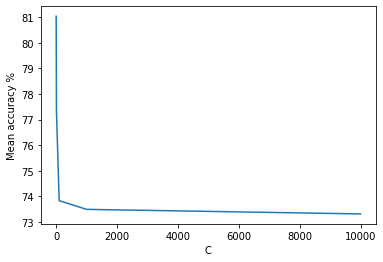

In [ ]:
mean_accuracy = []

for i in [1,10,100,1000,10000]:
  pipe     = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                       ('scaler', StandardScaler()), 
                       ('rbf', SVC(kernel='rbf', C=i))])

  pipe.fit(x_train, y_train)
  scores = cross_val_score(pipe, x_train, y_train, cv=10)
  mean_accuracy.append(scores.mean())


C_df = pd.DataFrame([1,10,100,1000,10000])
C_df.rename({0:'C'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([C_df, mean_accuracy_df], axis=1)

print(to_plot)

plt.plot(to_plot['C'], to_plot['mean accuracy'])
plt.xlabel('C')
plt.ylabel('Mean accuracy %')
plt.show()

In [ ]:
# KNN knn = KNeighborsClassifier(n_neighbors = 3) knn.fit(X_train, Y_train)  Y_pred = knn.predict(X_test)  acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

# Step 8: Evaluate Your Best Model

Evaluate your best model using the test set. 

*   Which model fit the data best?
*   What was the best accuracy you were able to achieve?  

**Note**: Use comments in your code and text blocks to explain your decisions and results.

I believe the random forest would be the best model due to the average accuracy of 82% with a standard deviation of 4 %. The standard deviation shows us, how precise the estimates are.

This means in our case that the accuracy of our model can differ + — 4%.

Random forest can build multiple decision trees and merges them together to get a more accurate and stable prediction as you can see below.

One big advantage of random forest is, that it can be used for both classification and regression problems. It has its hyperparameters of a decision-tree classifier and bagging classifiers to control its model.

The random-forest algorithm brings extra randomness into the model, when it is growing the trees. Instead of searching for the best feature while splitting a node, it searches for the best feature among a random subset of features. This process creates a wide diversity, which generally results in a better model. Therefore when you are growing a tree in random forest, only a random subset of the features is considered for splitting a node. You can even make trees more random, by using random thresholds on top of it, for each feature rather than searching for the best possible thresholds (like a normal decision tree does).

Another great quality of random forest is that they make it very easy to measure the relative importance of each feature. Sklearn measure a features importance by looking at how much the tree nodes, that use that feature, reduce impurity on average (across all trees in the forest). It computes this score automaticaly for each feature after training and scales the results so that the sum of all importances is equal to 1. 

In [ ]:
# Step 8
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.74444444 0.79775281 0.76404494 0.7752809  0.86516854 0.82022472
 0.84269663 0.76404494 0.80898876 0.83146067]
Mean: 0.8014107365792761
Standard Deviation: 0.03717214785019972


In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
PassengerId,0.244
Title,0.152
Sex,0.145
Age_Class,0.073
Pclass,0.062
Age,0.058
Deck,0.058
Fare,0.050
Fare_Per_Person,0.050


<AxesSubplot:xlabel='feature'>

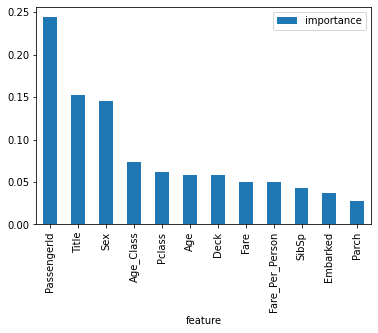

In [ ]:
importances.plot.bar()

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)


random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

100.0 %


Our random forest model predicts as good as it did before. I believe the more features you have, the more likely your model will suffer from overfitting and vice versa. But I think our data looks fine for now and hasn't too much features.

There is also another way to evaluate a random-forest classifier, which is probably much more accurate than the score we used before. What I am talking about is the out-of-bag samples to estimate the generalization accuracy. The out-of-bag estimate is as accurate as using a test set of the same size as the training set. Therefore, using the out-of-bag error estimate removes the need for a set aside test set.

In [ ]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 80.02 %


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[462,  87],
       [ 86, 256]])

The first row is about the not-survived-predictions: 462 passengers were correctly classified as not survived and 87 where wrongly classified as not survived (false positives).

The second row is about the survived-predictions: 86 passengers where wrongly classified as survived (false negatives) and 256 where correctly classified as survived (true positives).

A confusion matrix gives you a lot of information about how well your model does, but theres a way to get even more, like computing the classifiers precision.

In [ ]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.7463556851311953
Recall: 0.7485380116959064


Our model predicts 74% of the time, a passengers survival correctly (precision)

The recall tells us that it predicted the survival of 74 % of the people who actually survived.

In [ ]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.7474452554744526

There we have it, a 74 % F-score. The score is not that high, because we have a recall of 74%. But unfortunately the F-score is not perfect, because it favors classifiers that have a similar precision and recall. This is a problem, because you sometimes want a high precision and sometimes a high recall. The thing is that an increasing precision, sometimes results in an decreasing recall and vice versa (depending on the threshold). 

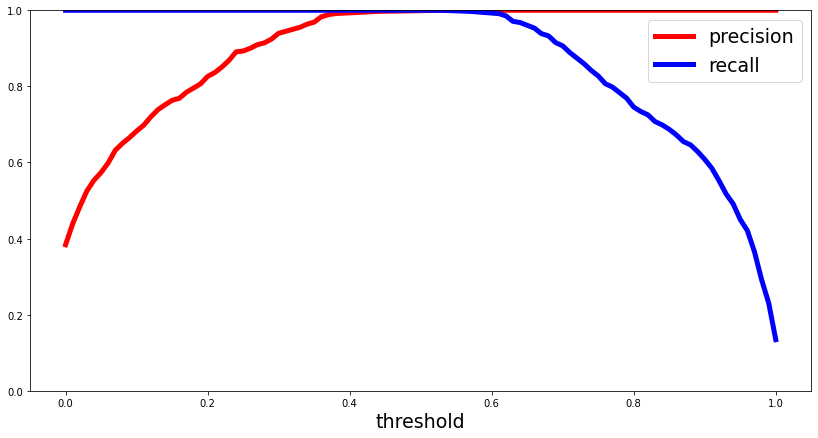

In [ ]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

You are now able to choose a threshold, that gives you the best precision/recall tradeoff for your current machine learning problem. If you want for example a precision of 80%, you can easily look at the plots and see that you would need a threshold of around 0.4. Then you could train a model with exactly that threshold and would get the desired accuracy.

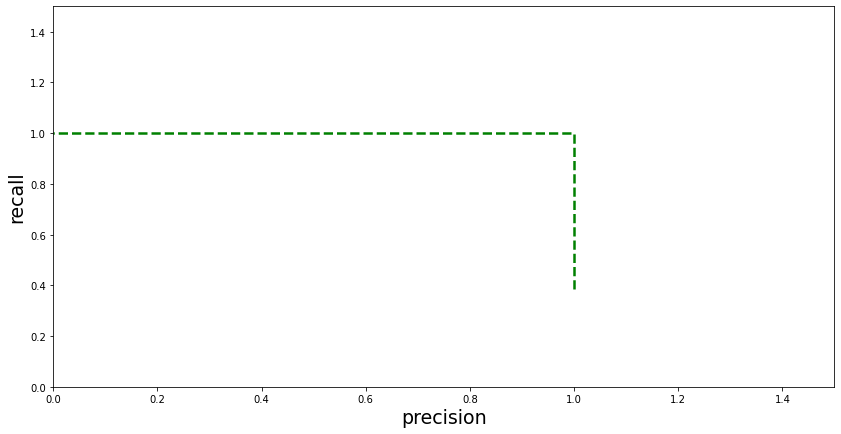

In [ ]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

Another way to evaluate and compare your binary classifier is provided by the ROC AUC Curve. This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall.

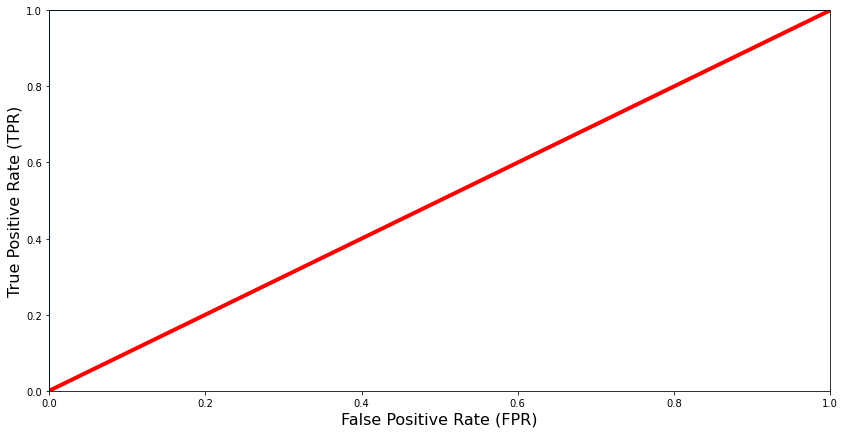

In [ ]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

The red line in the middle represents a purely random classifier. For example a flip coin can be described and therefore your classifier should be as far away from it as possible. Our Random Forest model seems to do a good job.

Of course we also have a tradeoff here, because the classifier produces more false positives, the higher the true positive rate is

In [ ]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 1.0


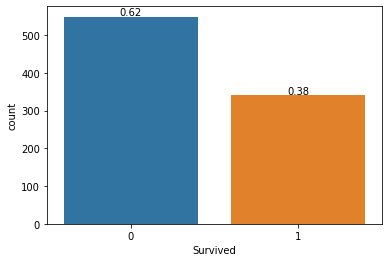

In [ ]:
ax = sns.countplot(x = 'Survived',data = Titanic) 
total = float(len(Titanic))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

#Step 9: Final Reporting

Summarize your model building process:  
* How did you identify the model target and features?  
* What steps did you take to prepare the data for modeling?  
* Which baseline model did you choose and why? How did you evaluate the model's performance?  
* Which other model(s) did you choose and why? How did you evaluate the model's performace?  
* What was the best model you developed? How well did the model perform on the test data?

#Step 9:

We started with the data exploration where we got a feeling for the dataset, checked about missing data and learned which features are important. During this process we used seaborn and matplotlib to do the visualizations. During the data preprocessing part, we computed missing values, converted features into numeric ones, grouped values into categories and created a few new features. Afterwards we started training 8 different machine learning models, picked one of them (random forest) and applied cross validation on it. Then I discussed how random forest works, took a look at the importance it assigns to the different features and tuned it’s performace through optimizing it’s hyperparameter values. Lastly, we looked at it’s confusion matrix and computed the models precision, recall and f-score.

Like I mentioned earlier, I believe the random forest would be the best model due to the average accuracy of 82% with a standard deviation of 4 %. The standard deviation shows us, how precise the estimates are.

This means in our case that the accuracy of our model can differ + — 4%.